In [8]:
from google.colab import files
uploaded = files.upload()

import zipfile
import os

zip_file_name = 'MachineLearningRating_v3.zip'

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall()

import pandas as pd

print("Extracted files:", os.listdir())

df = pd.read_csv('MachineLearningRating_v3.txt', sep='|')

print(df.describe())
df.info()

missing_values = df.isnull().sum().sort_values(ascending=False)

Saving MachineLearningRating_v3.zip to MachineLearningRating_v3 (1).zip
Extracted files: ['.config', 'MachineLearningRating_v3.txt', 'MachineLearningRating_v3 (1).zip', 'MachineLearningRating_v3.zip', 'sample_data']


/tmp/ipython-input-8-3409143266.py:16: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MachineLearningRating_v3.txt', sep='|')


       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

## Predictive Modeling

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Simplify columns
features = ['Province', 'VehicleType', 'Gender', 'CustomValueEstimate', 'SumInsured']
target = 'TotalClaims'

df_model = df[features + [target]].dropna()
X = pd.get_dummies(df_model[features])
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print("RMSE:", root_mean_squared_error(y_test, preds))
print("R2:", r2_score(y_test, preds))


RMSE: 2331.2413425315804
R2: -0.00010883583369403205


### Random Forest and XGBoost

In [ ]:
!pip install xgboost

In [11]:
import xgboost as xgb


from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### SHAP for Interpretability

In [ ]:
!pip install shap

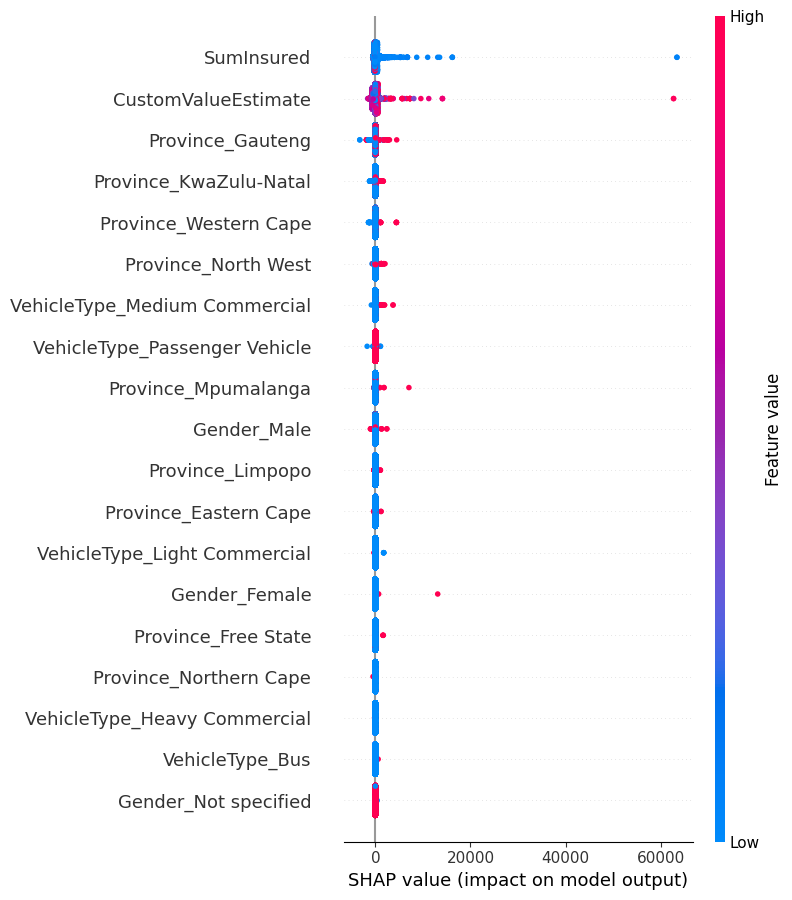

In [12]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)
